<a href="https://colab.research.google.com/github/kherox/deep-learning/blob/master/deep_cnn_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==2.0.0-Alpha0
import tensorflow as tf

from IPython import display
# To generate GIFs
!pip install -q imageio

import glob
import imageio
import os
import PIL


In [0]:
cifar10 = tf.keras.datasets.cifar10
dataset = cifar10.load_data()
(images , targets) , (img_test,tgets_test) = dataset

In [0]:
from sklearn.model_selection import train_test_split
test_img,val_img,test_label , val_label = train_test_split(img_test,tgets_test,test_size=0.1)

In [53]:
model = tf.keras.models.Sequential()

#Convolution model
model.add(tf.keras.layers.Conv2D(64 , (3,3) ,padding="same",input_shape=(32,32,3)))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Conv2D(128,(3,3)))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(tf.keras.layers.BatchNormalization())



model.add(tf.keras.layers.Conv2D(256,(3,3)))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(512,(2,2)))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(1,1),strides=(2,2)))
model.add(tf.keras.layers.BatchNormalization())


print(model.output_shape)

(None, 1, 1, 512)


In [54]:
#Dense Connected or >FullyConnected 
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128 , activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Dense(256 , activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Dense(512 , activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))


model.add(tf.keras.layers.Dense(1024 , activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))


model.add(tf.keras.layers.Dense(10 , activation="relu"))
model.add(tf.keras.layers.Activation("softmax"))

print(model.output_shape)

(None, 10)


In [55]:

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) #learning_rate=0.01,momentum=0.6
model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])

model.fit(images,targets,epochs=10,validation_split=0.2,verbose=True, batch_size=32)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 312s 8ms/sample - loss: 1.9541 - accuracy: 0.3214 - val_loss: 1.5023 - val_accuracy: 0.4679
Epoch 2/10
40000/40000 [==============================] - 312s 8ms/sample - loss: 1.4004 - accuracy: 0.5042 - val_loss: 1.3436 - val_accuracy: 0.4996
Epoch 3/10
40000/40000 [==============================] - 313s 8ms/sample - loss: 1.1930 - accuracy: 0.5840 - val_loss: 1.2319 - val_accuracy: 0.5613
Epoch 4/10
40000/40000 [==============================] - 312s 8ms/sample - loss: 1.0463 - accuracy: 0.6403 - val_loss: 1.2070 - val_accuracy: 0.5706
Epoch 5/10
40000/40000 [==============================] - 312s 8ms/sample - loss: 0.9637 - accuracy: 0.6698 - val_loss: 1.5341 - val_accuracy: 0.5025
Epoch 6/10
40000/40000 [==============================] - 313s 8ms/sample - loss: 0.8919 - accuracy: 0.6961 - val_loss: 1.1736 - val_accuracy: 0.6124
Epoch 7/10
40000/40000 [==========================

In [56]:
loss,acc = model.evaluate(test_img,test_label)
print("Loss is {} and accurracy is {} ".format(loss,acc))

9000/9000 [==============================] - 13s 1ms/sample - loss: 0.8141 - accuracy: 0.7239
Loss is 0.8141321836047702 and accurracy is 0.7238888740539551 


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [0]:
def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
labels = load_label_names()
accurracy  = []
predictions = []

In [0]:
for image , label in zip(val_img,val_label):
  print(labels[int(label)])
  plt.imshow(image)
  break

In [111]:
for image , label in zip(val_img,val_label):
  predict = model.predict(val_img[0:1 ,:,:,:])
  print(predict[0])
  
  break

[1.7665027e-03 8.8570334e-05 8.8570334e-05 8.8570334e-05 8.8570334e-05
 8.8570334e-05 8.8570334e-05 8.8570334e-05 9.9714988e-01 4.6355830e-04]


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


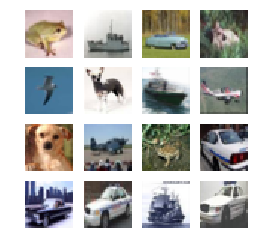

Total real prediction is 715 on 1000
Percentage is 72 % 


In [133]:
position = 0
true_pred = 0
fig = plt.figure(figsize=(4,4))
i = 0
for image , label in zip(val_img,val_label):
  predict = model.predict(val_img[position:position+1 ,:,:,:])
  pred_label = np.argmax(predict[0])
  predictions.append("True Label is {} and Predicted Label is {}".format(labels[int(label)] ,  labels[int(pred_label)]))
  accurracy.append(predict)
  if label == pred_label :
    if (i >= 16):
      i = 0
    plt.subplot(4, 4, i+1)
    #plt.title("True Label is {} and Predicted Label is {}".format(labels[int(label)] ,  labels[int(pred_label)]))
    plt.imshow(image,cmap='gist_rainbow')
    plt.axis('off')
    plt.savefig('image_at_position_{:04d}.png'.format(position))
    true_pred = true_pred + 1
  position = position + 1
  i = i+1
  
print("Total real prediction is {} on {}".format(true_pred, len(val_img)))
print("Percentage is {} % ".format( round(true_pred / len(val_img) * 100 )))
 

In [0]:
with imageio.get_writer('deepcnncifar10.gif', mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  last = -1
  for i,filename in enumerate(filenames):
    frame = 2*(i**0.5)
    if round(frame) > round(last):
      last = frame
    else:
      continue
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)
    
# A hack to display the GIF inside this notebook
os.rename('deepcnncifar10.gif', 'deepcnncifar10.gif.png')

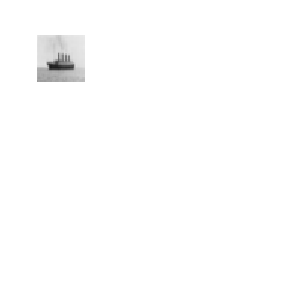

In [139]:
display.Image(filename="deepcnncifar10.gif.png")
